In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np

# Import data

In [2]:
row_number = 477708
df = pd.read_fwf('../data/MCI_releases_time.csv', infer_nrows=row_number, header=None)
df = df[0].str.split(';', expand=True)
col_number = df.shape[1]
print(df.shape)

(477707, 4620)


# Data transform

In [3]:
allProjectsRhythm = []
maxSize = 0
for index, row in df.iterrows():
    listRhythmByQuarterAvg = []
    tmpList = []
    for i in range(2, col_number):
        if(row[i] == None):
            break
        date = datetime.strptime(row[i], '%Y-%m-%d')
        previousDate = datetime.strptime(row[i-1], '%Y-%m-%d')
        diffInDays = (date-previousDate).days
        if(diffInDays > 0):
            tmpList.append(diffInDays)
    if(len(tmpList)>maxSize):
        maxSize = len(tmpList)
    if(len(tmpList)>0):
        allProjectsRhythm.append(tmpList)

allAverageRhythm = []
more400AverageRhythm = []
for i in range(0, maxSize):
    tmpListAll = []
    tmpListMore400 = []
    for project in allProjectsRhythm:
        if(len(project) > i):
            tmpListAll.append(project[i])
            if(len(project) > 400):
                tmpListMore400.append(project[i])
                
    allAverageRhythm.append(sum(tmpListAll) / len(tmpListAll))
    more400AverageRhythm.append(sum(tmpListMore400) / len(tmpListMore400))

# Save data

In [4]:
with open('allAverageRhythmData.txt', 'w') as f:
    for item in allAverageRhythm:
        f.write("%s\n" % item)
        
with open('more400AverageRhythmData.txt', 'w') as f:
    for item in more400AverageRhythm:
        f.write("%s\n" % item)


# Plot data all

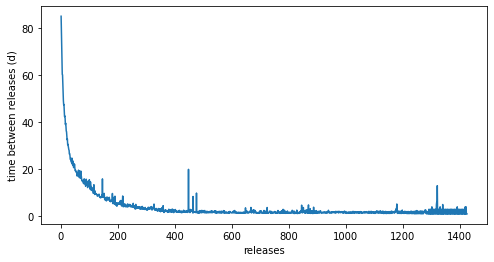

In [5]:
fig = plt.figure(figsize =(8, 4))

x = range(2, len(allAverageRhythm)+2)
plt.plot(x, allAverageRhythm)

plt.xlabel('releases')
plt.ylabel('time between releases (d)')

plt.rcParams.update({'font.size': 15})

plt.savefig('releases_rhythm_evolution_all.png', format='png', bbox_inches="tight")
plt.show()
plt.close()

# Plot data more than 400 releases

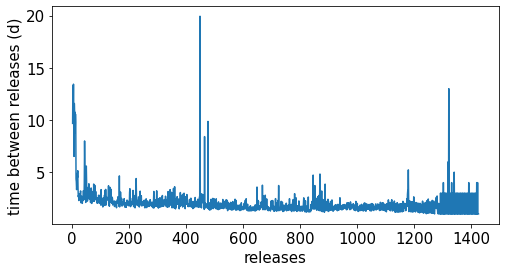

In [6]:
fig = plt.figure(figsize =(8, 4))

x = range(2, len(more400AverageRhythm)+2)
plt.plot(x, more400AverageRhythm)

plt.xlabel('releases')
plt.ylabel('time between releases (d)')

plt.rcParams.update({'font.size': 15})

plt.savefig('releases_rhythm_evolution_more400.png', format='png', bbox_inches="tight")
plt.show()
plt.close()